## Tutorial 1 : Regression 

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [5]:
lr =LinearRegression()
boston= load_boston()
lr.fit(boston.data, boston.target)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs =1, normalize=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

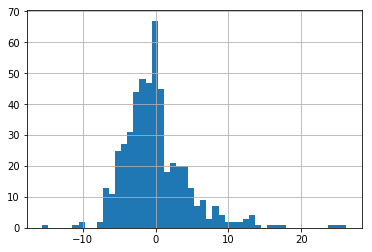

In [9]:
pred = lr.predict(boston.data)
pd.Series(boston.target - pred).hist(bins=50)

In [10]:
# Goefficient
lr.coef_

array([ -1.07170557e-01,   4.63952195e-02,   2.08602395e-02,
         2.68856140e+00,  -1.77957587e+01,   3.80475246e+00,
         7.51061703e-04,  -1.47575880e+00,   3.05655038e-01,
        -1.23293463e-02,  -9.53463555e-01,   9.39251272e-03,
        -5.25466633e-01])

The negative coefficient can be explained by the relationship between the per capita crime rate be town with the price of house in Boston. This coefficient is indicated by the first coefficient in the regression.

In [11]:
# Intercept
lr.intercept_

36.491103280363134

##  To display of all coefficients'name, type dir(lr)

In [12]:
dir(lr)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_cache',
 '_abc_negative_cache',
 '_abc_negative_cache_version',
 '_abc_registry',
 '_decision_function',
 '_estimator_type',
 '_get_param_names',
 '_preprocess_data',
 '_residues',
 '_set_intercept',
 'coef_',
 'copy_X',
 'fit',
 'fit_intercept',
 'get_params',
 'intercept_',
 'n_jobs',
 'normalize',
 'predict',
 'rank_',
 'score',
 'set_params',
 'singular_']

## Fitting model with cross validation prediction

In [13]:
from sklearn.model_selection import cross_val_predict

In [15]:
preds_cv = cross_val_predict(lr, boston.data,boston.target, cv=10)

## Plot residuals of predictions vs ground true

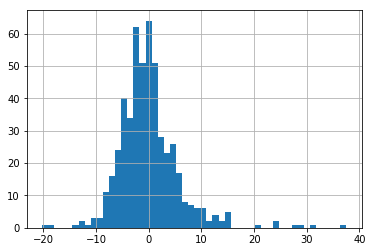

In [16]:
pd.Series(boston.target - preds_cv).hist(bins=50)

## Evaluating prediction

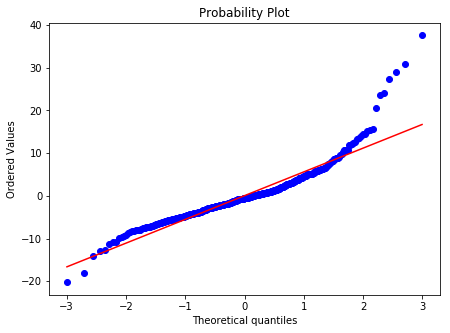

In [17]:
from scipy.stats import probplot
f = plt.figure(figsize=(7,5))
ax = f.add_subplot(111)
tuple_out = probplot(boston.target - preds_cv,plot=ax)

In [18]:
# Get access coefficient for regression line: slope, intercept, r (square root of the coefficient of determination)
tuple_out[1]

(5.5560707355667613, 0.033491319586210058, 0.93986352421028652)

In [19]:
def MSE(target,predictions):
    squared_deviation = np.power(target - predictions,2)
    return np.mean(squared_deviation)
MSE(boston.target,pred)

21.897779217687496

In [20]:
def MAD(target, predictions):
    absolute_deviation =np.abs(target - predictions)
    return np.mean(absolute_deviation)
MAD(boston.target, pred)

3.272944637996908

## Using sklearn.metric 

In [24]:
from sklearn.metrics import mean_absolute_error , mean_squared_error

print('MSE = ',mean_squared_error(boston.target, pred))
print('MAD = ',mean_absolute_error(boston.target, pred))

MSE =  21.8977792177
MAD =  3.272944638


## Bootstrap

In [25]:
n_bootstraps =1000
len_boston =len(boston.target)
subsample_size = np.int(0.5* len_boston)

subsample = lambda: np.random.choice(np.arange(0,len_boston),size= subsample_size)

In [26]:
coefs = np.ones(n_bootstraps)
for i in range(n_bootstraps):
    subsample_idx =subsample()
    subsample_X   = boston.data[subsample_idx]
    subsample_y = boston.target[subsample_idx]
    lr.fit(subsample_X, subsample_y)
    coefs[i] = lr.coef_[0]

(array([   1.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    1.,    2.,    0.,
           2.,    1.,    6.,   14.,   33.,   53.,   78.,  120.,  125.,
         110.,  111.,   86.,   68.,   38.,   34.,   26.,   23.,   19.,
          12.,   10.,    6.,    7.,    5.,    2.,    2.,    1.,    1.,
           0.,    1.,    1.,    0.,    1.]),
 array([-0.50041313, -0.4861583 , -0.47190346, -0.45764863, -0.44339379,
        -0.42913896, -0.41488413, -0.40062929, -0.38637446, -0.37211962,
        -0.35786479, -0.34360996, -0.32935512, -0.31510029, -0.30084545,
        -0.28659062, -0.27233579, -0.25808095, -0.24382612, -0.22957128,
        -0.21531645, -0.20106162, -0.18680678, -0.17255195, -0.15829712,
        -0.14404228, -0.12978745, -0.11553261, -0.10127778, -0.08702295,
        -0.07276811, -0.05851328, -0.04425844, -0.03000361, -0.01574878,
        -0.00149394,  0.01276089,  0.02701573,  0.04127056,  0.05552539,
         0.06978

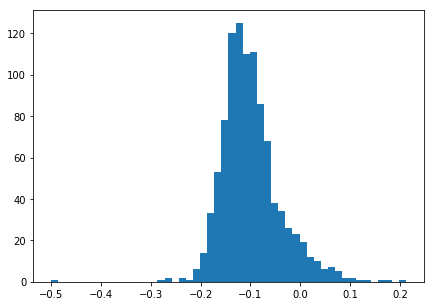

In [32]:
f =plt.figure(figsize=(7,5))
ax =f.add_subplot(111)
ax.hist(coefs, bins=50)

## Bootstrap confidence interval
Bootstrapping can potentially lead to better estimates for coefficients since bootstrapped mean with convergence to the true mean is faster than finding the coefficient using regular estimation

In [33]:
np.percentile(coefs,[2.5,97.5])

array([-0.18748927,  0.04742417])

## Ridge Regression

In [45]:
from sklearn.linear_model import Ridge
r= Ridge()
n_bootstraps =1000
len_data = len(boston.target)
subsample_size =np.int(0.5* len_data)
subsample = lambda: np.random.choice(np.arange(0, len_data),size=subsample_size)


In [55]:
coefs_r = np.ones((n_bootstraps,3))
for i in range(n_bootstraps):
    subsample_idx =subsample()
    subsample_X = boston.data[subsample_idx]
    subsample_y = boston.target[subsample_idx]
    r.fit(subsample_X,subsample_y)
    coefs_r[i][0]= r.coef_[0]
    coefs_r[i][1]= r.coef_[1]
    coefs_r[i][2]=r.coef_[2]

(array([   2.,    7.,   46.,  140.,  292.,  275.,  171.,   56.,    9.,    2.]),
 array([-0.30390289, -0.24797343, -0.19204397, -0.13611451, -0.08018505,
        -0.02425559,  0.03167387,  0.08760333,  0.14353279,  0.19946226,
         0.25539172]),
 <a list of 10 Patch objects>)

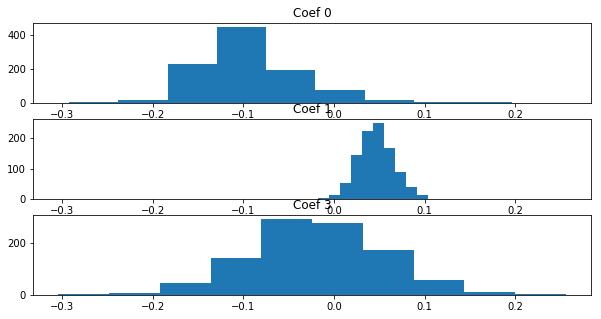

In [57]:
plt.figure(figsize=(10,5))
ax1 = plt.subplot(311,title='Coef 0')
ax1.hist(coefs_r[:,0])
ax2 = plt.subplot(312,sharex =ax1,title='Coef 1')
ax2.hist(coefs_r[:,1])
ax3 = plt.subplot(313,sharex =ax1,title='Coef 3')
ax3.hist(coefs_r[:,2])

## Check Ridge variance

In [58]:
print('Variance of Linear regression =', np.var(coefs,axis=0))

0.0035990766906830443

In [60]:
print('Variane of Ridge regression =',np.var(coefs_r,axis=0))

Variane of Ridge regression = [ 0.00335495  0.00038357  0.00526386]


## Optimazing Ridge regression
sklearn provides RidgeCV  to perform a cross-validation similar to leave-one-out-cross-validation __(LOOCV)__

In [65]:
from sklearn.linear_model import RidgeCV
r_cv = RidgeCV(alphas=[.08,.09, .1,.15,.2,.3,.4])
r_cv.fit(boston.data,boston.target)

RidgeCV(alphas=[0.08, 0.09, 0.1, 0.15, 0.2, 0.3, 0.4], cv=None,
    fit_intercept=True, gcv_mode=None, normalize=False, scoring=None,
    store_cv_values=False)

In [66]:
r_cv.alpha_

0.080000000000000002

## To store cross validation value

In [71]:
alpha_test = np.linspace(0.01,1)
r_cv = RidgeCV(alphas= alpha_test, store_cv_values=True)
r_cv.fit(boston.data,boston.target)

RidgeCV(alphas=array([ 0.01   ,  0.0302 ,  0.05041,  0.07061,  0.09082,  0.11102,
        0.13122,  0.15143,  0.17163,  0.19184,  0.21204,  0.23224,
        0.25245,  0.27265,  0.29286,  0.31306,  0.33327,  0.35347,
        0.37367,  0.39388,  0.41408,  0.43429,  0.45449,  0.47469,
        0.4949 ,  0.5151 ...3837,
        0.85857,  0.87878,  0.89898,  0.91918,  0.93939,  0.95959,
        0.9798 ,  1.     ]),
    cv=None, fit_intercept=True, gcv_mode=None, normalize=False,
    scoring=None, store_cv_values=True)

In [72]:
r_cv.cv_values_.shape

(506, 50)

## Initially,  506 values in the initial regression, tested 50 different alpha values

In [74]:
smallest_idx = r_cv.cv_values_.mean(axis=0).argmin()
alpha_test[smallest_idx]

0.030204081632653063

In [75]:
# check
r_cv.alpha_

0.030204081632653063

## Using loss function
Since this is a loss function, we use sklearn to flip the sign from maximization problem to minimization problem.

In [78]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import make_scorer
MAD_scorer = make_scorer(mean_absolute_error,greater_is_better=True)

In [79]:
r_cv =RidgeCV(alphas = alpha_test, store_cv_values= True, scoring= MAD_scorer)
r_cv.fit(boston.data,boston.target)
smallest_idx = r_cv.cv_values_.mean(axis=0).argmin()

In [82]:
r_cv.cv_values_.mean(axis=0)[smallest_idx]

-0.021080465905580974

In [83]:
alpha_test[smallest_idx]

0.01

## Bayesian Ridge Regression

In [ ]:
from sklearn.linear_model import BayesianRidge
